Libraries Importing

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data preprocessing

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

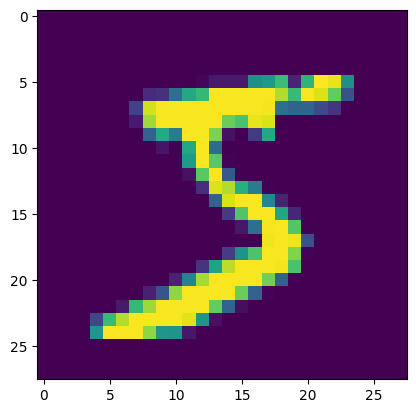

In [4]:
plt.imshow(x_train[0])

In [31]:
y_train[0]

5

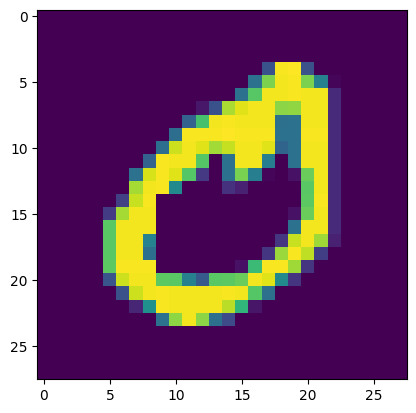

In [5]:
plt.imshow(x_train[21])

In [6]:
y_train[21]

0

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
x_train.min(), x_train.max()

(0, 255)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [11]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
input_shape = x_train[0].shape

In [17]:
print(input_shape)

(28, 28, 1)


Model Building

In [18]:
# define an object
model = tf.keras.models.Sequential()

In [19]:
# Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Adding third CNN layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# addding flatten layer
model.add(tf.keras.layers.Flatten())

# fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

Model Training

In [22]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 17s 28ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.0406 - val_sparse_categorical_accuracy: 0.9859
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0333 - val_sparse_categorical_accuracy: 0.9883
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0324 - val_sparse_categorical_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0313 - val_sparse_categorical_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0156 - spars

In [23]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_pred[15], y_test[15]

(5, 5)

In [29]:
y_pred[5], y_test[5]

(1, 1)

In [30]:
y_pred[103], y_test[103]

(4, 4)

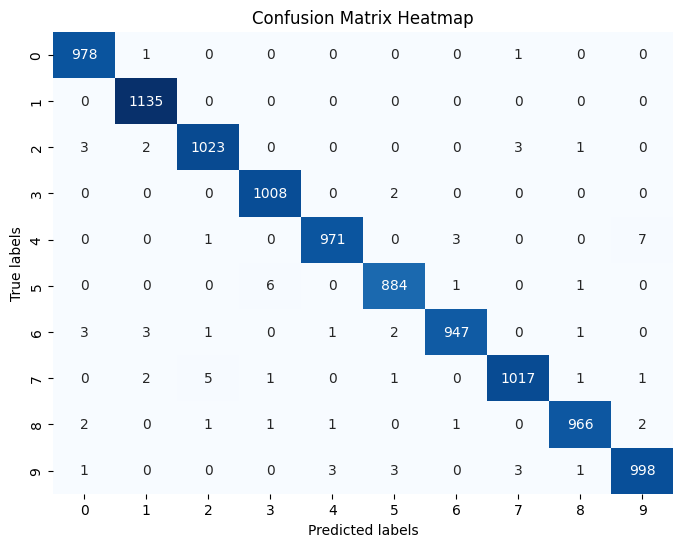

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization
plt.figure(figsize=(8,6))  # Adjust the size if needed
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

# Show the heatmap
plt.show()


In [26]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9927


Learning Curve

In [27]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

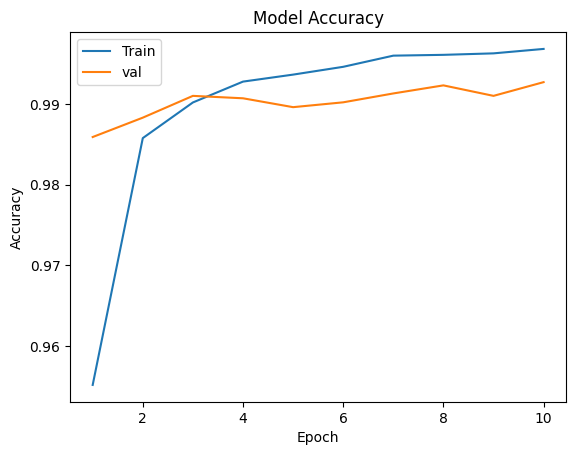

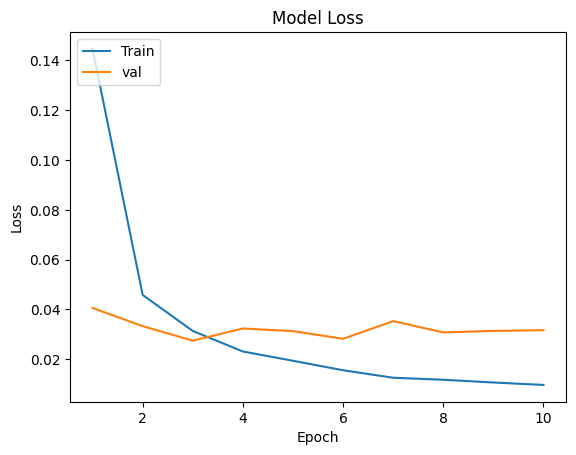

In [28]:
learning_curve(history, 10)